<a href="https://colab.research.google.com/github/Sam-Joshua-S/100DaysOfData/blob/main/Day%2015-multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


##Load Dataset

In [ ]:
df=pd.read_csv(r"https://raw.githubusercontent.com/AVKuzminov/data/master/SAT_GPA.csv",sep=" ")

About Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high_GPA  105 non-null    float64
 1   math_SAT  105 non-null    int64  
 2   verb_SAT  105 non-null    int64  
 3   comp_GPA  105 non-null    float64
 4   univ_GPA  105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.2 KB


In [ ]:
df.describe()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.076381,623.076190,598.600000,3.128000,3.172857
std,0.516598,53.760454,62.963604,0.509046,0.447194
min,2.030000,516.000000,480.000000,2.030000,2.080000
25%,2.670000,573.000000,548.000000,2.870000,3.010000
50%,3.170000,612.000000,591.000000,3.210000,3.290000
75%,3.480000,675.000000,645.000000,3.490000,3.470000
max,4.000000,718.000000,732.000000,4.000000,3.810000


##Regression

In [ ]:
x=df.drop(["univ_GPA"],axis=1)
Y=df.univ_GPA

In [ ]:
x = sm.add_constant(x)
result = sm.OLS(Y,x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               univ_GPA   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     200.3
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           8.20e-47
Time:                        17:09:26   Log-Likelihood:                 51.445
No. Observations:                 105   AIC:                            -92.89
Df Residuals:                     100   BIC:                            -79.62
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5596      0.187      2.996      0.003       0.189       0.930
high_GPA       0.0721      0.056      1.297      0.198      -0.038       0.182
math_SAT      -0.0007      0.001     -1.304      0.195      -0.002       0.000
verb_SAT       0.0008      0.000      1.814      0.073   -7.52e-05       0.002
comp_GPA       0.7568      0.049     15.469      0.000       0.660       0.854
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.294
Skew:                          -0.317   Prob(JB):                       0.0709
Kurtosis:                       3.899   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Checking p<0.05 means that feature is significant
##Check F-Satistics where lower the F stats value means lower significant

#Assumption of linear regression

*  Linearity
###    easy way to check linearity by scatter plot
<img src='https://images.deepai.org/django-summernote/2019-03-15/446c7799-5959-4555-9e75-411820e15d16.png'>

*  # No Endogeneity
## error is correlated with independent variable
## this is because forget to include add an feature
## for example if like want predict the real estate price but you use only size feature but you realize small house in city cost is equal to large property cost


*  # Normality and Homoscedasity
## It means same variance for all error
<img src='https://th.bing.com/th/id/R.a181150a0ad79529c998a2094ef567a1?rik=Cr1FJwUC8BUYzg&riu=http%3a%2f%2fmarcfbellemare.com%2fwordpress%2fwp-content%2fuploads%2f2015%2f09%2fHeteroskedasticity.png&ehk=%2biXCfkv0lPkQOZmI8S5UC3Vny8ZxpflfJEpotq1fofk%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1'></img>

## It can be resolved by log tranformation
## Removing Outlier

In [ ]:
data = pd.read_csv(r"https://raw.githubusercontent.com/ajay-111/Assumption-of-Linear-Regression/main/linear_assumption.csv")

In [ ]:
data.describe()

,feature1,feature2,feature3,target
count,200.000000,200.000000,200.000000,200.000000
mean,0.019595,-0.045539,0.048697,4.323508
std,1.041478,1.057713,0.974019,97.258970
min,-2.915738,-2.983970,-2.272244,-257.063427
25%,-0.647775,-0.810995,-0.650268,-60.735485
50%,0.007320,0.013617,-0.078591,2.991268
75%,0.704479,0.680593,0.729907,76.404521
max,3.314304,2.676112,2.811878,290.546161


In [ ]:
x=data['feature3']
y=data['target']

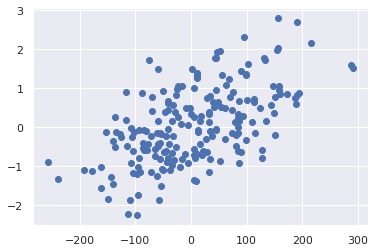

In [ ]:
plt.scatter(y,x)

*  # No Autocorrelation
## error are assume to be uncorrelated 
## we can detect by durbin watson check whether number is between 1 and 3 
## there is no remedy for this type of regression 

*  # No Multicollinearity
##  If both feature are moving together means collinearity
## this can example predict unknown celsius value using kelvin and fahrenheit
## what's wrong with this model is they both are collinear so
## to prevent this by removing one variable
## or to tranform into one.

In [7]:

import pandas as pd


data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18], 'above 18':['y','n','y','n']}

df = pd.DataFrame(data)

print(df)


    Name  Age above 18
0    Tom   20        y
1   nick   21        n
2  krish   19        y
3   jack   18        n


In [8]:
df['above 18'] = df['above 18'].map({'y':1,'n':0})

In [9]:
df

,Name,Age,above 18
0,Tom,20,1
1,nick,21,0
2,krish,19,1
3,jack,18,0
